# Classifaction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from sklearn.datasets import fetch_openml

mist = fetch_openml('mnist_784', as_frame = False)      # for uploading dataset
# mist

C:\Users\aqili\AppData\Local\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = mist.data, mist.target
# X[0].reshape(28,28)

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
# plt.imshow(X[0])

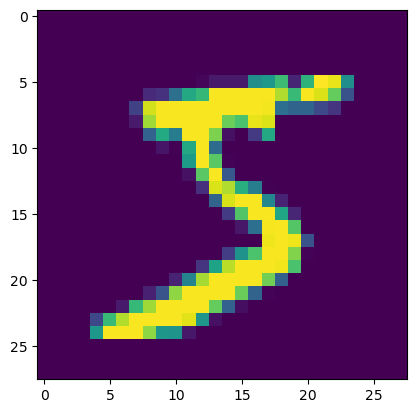

In [6]:
plt.imshow(X[0].reshape(28,28))

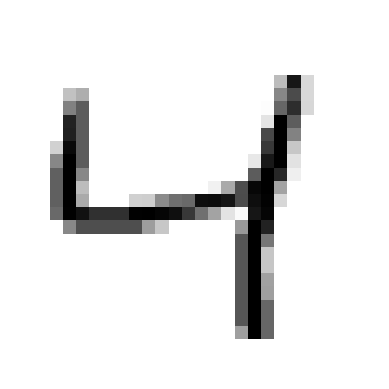

In [7]:
plt.imshow(X[2].reshape(28,28), cmap = 'binary')
plt.axis('off');

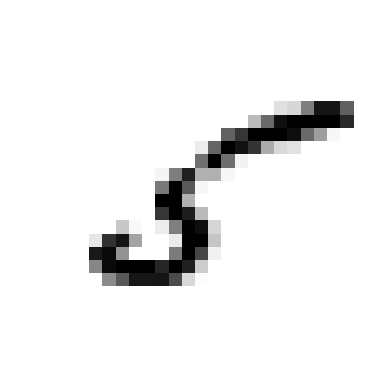

In [8]:
def digit_image(digit):
  plt.imshow(X[digit].reshape(28,28), cmap = 'binary')
  plt.axis('off');

digit_image(11)

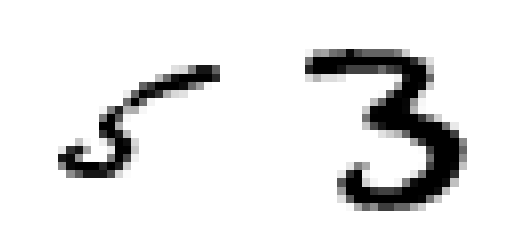

In [9]:
plt.subplot(1,2,1)     # one row, 2column, first img
digit_image(11)
plt.subplot(1,2,2)
digit_image(12)
plt.show()

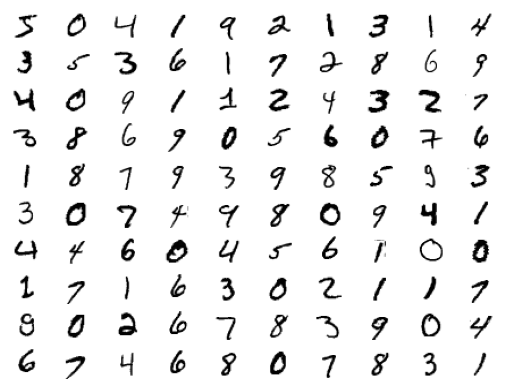

In [10]:
for idx, image in enumerate(X[0:100]):
  plt.subplot(10, 10,idx+1)
  digit_image(idx)
plt.show()

In [11]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [12]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [13]:
y_train[:5], y_train_5[:5]

(array(['5', '0', '4', '1', '9'], dtype=object),
 array([ True, False, False, False, False]))

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.score(X_test, y_test_5)

0.9492

In [16]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [17]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [18]:
dummy_clf.score(X_test, y_test_5)

0.9108

In [19]:
any([False, True,False]), any([False, False,False])
# if there is one True, returns True, ELSE false

(True, False)

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [21]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [23]:
recall_score(y_train_5, y_train_pred),f1_score(y_train_5, y_train_pred)

(0.6511713705958311, 0.7325171197343846)

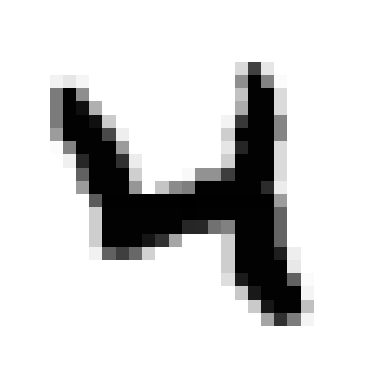

In [24]:
digit_image(20)

In [25]:
some_digit = X[0]
y_score = sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [26]:
threshold = 0
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([ True])

In [27]:
threshold = 3000
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([False])

In [28]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5, cv = 3, method = 'decision_function')

In [29]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

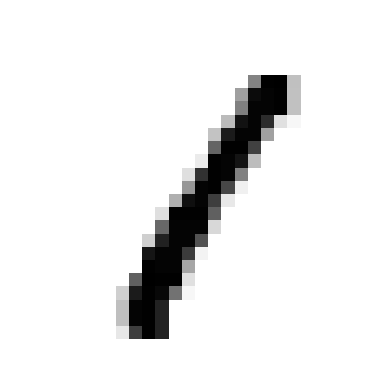

In [30]:
digit_image(3)

In [31]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

In [32]:
precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [33]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [34]:
thresholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

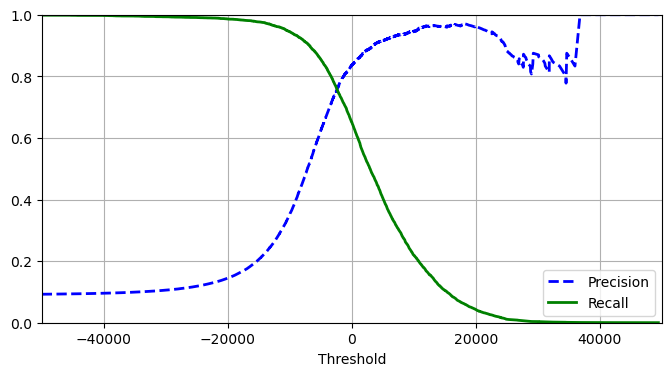

In [35]:
plt.figure(figsize = (8,4))
plt.plot(thresholds,precisions[:-1],'b--',label = 'Precision', linewidth = 2)
plt.plot(thresholds,recalls[:-1],'g-',label = 'Recall',linewidth = 2)

plt.axis([-50000,50000,0,1])
plt.grid()
plt.xlabel('Threshold')
plt.legend(loc = 'lower right')
plt.show()

In [36]:
idx_precision_90 = (precisions >=0.9).argmax()
idx_precision_90

57109

In [37]:
recalls[idx_precision_90]

0.4799852425751706

In [38]:
thresholds_for_90 = thresholds[idx_precision_90]
thresholds_for_90

3370.0194991439557

In [39]:
y_train_pred_90 = (y_scores>=thresholds_for_90)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [40]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [41]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
forest_clf = RandomForestClassifier(random_state = 42)

In [44]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv = 2, method = 'predict_proba')

In [45]:
y_probas_forest

array([[0.2 , 0.8 ],
       [1.  , 0.  ],
       [0.98, 0.02],
       ...,
       [0.03, 0.97],
       [0.91, 0.09],
       [0.9 , 0.1 ]])

In [46]:
y_scores_forest = y_probas_forest[:,1]

precisions_forest,recalls_forest,thresholds_forest = precision_recall_curve(y_train_5,y_scores_forest)

In [47]:
precisions_forest[:5]

array([0.09035   , 0.14889585, 0.20381232, 0.2594667 , 0.31307061])

In [48]:
recalls_forest[:5]

array([1.        , 1.        , 1.        , 0.99981553, 0.9994466 ])

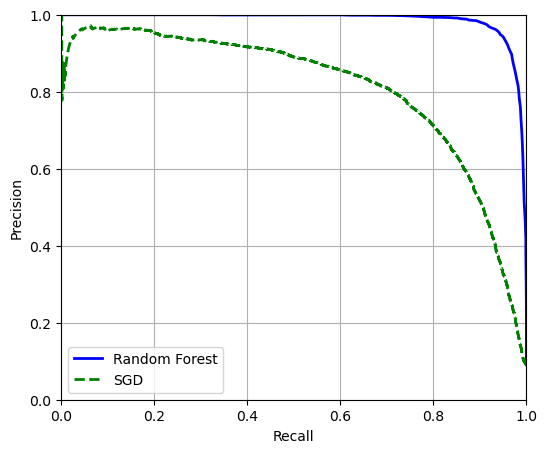

In [49]:
plt.figure(figsize = (6,5))
plt.plot(recalls_forest,precisions_forest,'b-',label = 'Random Forest',linewidth = 2)
plt.plot(recalls,precisions,'g--',label = 'SGD', linewidth = 2)

plt.axis([0,1,0,1])
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower left')
plt.show()

In [50]:
idx_90_precision_forest = (precisions_forest>=0.9).argmax()
idx_90_precision_forest

25

In [51]:
recalls_forest[idx_90_precision_forest]

0.9645821804095185

In [52]:
threshold_for_90_forest = thresholds_forest[idx_90_precision_forest]
threshold_for_90_forest

0.25

In [53]:
y_pred_90_forest = (y_scores_forest>=threshold_for_90_forest)

In [54]:
precision_score(y_train_5,y_pred_90_forest)

0.906396255850234

In [55]:
recall_score(y_train_5,y_pred_90_forest)

0.9645821804095185

# Multiclass Classification

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
forest_clf = RandomForestClassifier(random_state = 42)

In [58]:
forest_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [59]:
forest_clf.score(X_test,y_test)

0.9705

In [60]:
forest_clf.predict(X_train[0].reshape(1,-1))

array(['5'], dtype=object)

In [61]:
from sklearn.svm import SVC
svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train[:2000],y_train[:2000])

SVC(random_state=42)

In [78]:
svm_clf.score(X_test,y_test)

0.9302142857142857

In [62]:
svm_clf.predict([X_train[0]])

array(['5'], dtype=object)

In [63]:
# ovr|ova - one versus all|rest  0-1,2,3,4,5
# ovo  - one versus one 0-1, 0-2

In [64]:
some_digit_scores = svm_clf.decision_function([X_train[0]])
some_digit_scores

array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

In [65]:
classes_id = some_digit_scores.argmax()
classes_id

5

In [66]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [67]:
svm_clf.classes_[classes_id]

'5'

In [68]:
svm_clf.decision_function_shape = 'ovo'
some_digit_scores_ovo = svm_clf.decision_function([X_train[0]])
some_digit_scores_ovo

array([[ 0.11314332, -0.21144362, -0.97226923,  0.50926537, -1.00524263,
         0.18971803,  0.08767314, -0.31096994, -0.03885061, -0.45175117,
        -1.28080687,  0.25210289, -1.00847383, -0.12725616, -0.31581733,
        -0.89588797, -0.36453921, -0.92588341,  0.78675875, -0.99974949,
         0.45303827,  0.2427903 , -0.23896814,  0.24660197,  1.54035119,
        -0.76999021,  1.10914098,  1.13399179,  1.04030548,  1.20260951,
        -1.42133177, -0.53302981, -0.45416354, -0.98961137, -0.95359226,
         1.21202449,  0.99995787,  1.00013239,  1.07935139, -0.0180567 ,
        -0.67167471, -0.14405376, -0.30458887, -0.13465288,  0.24683723]])

In [69]:
some_digit_scores_ovo.argmax()

24

In [81]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsOneClassifier(SVC(random_state = 42))
ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsOneClassifier(estimator=SVC(random_state=42))

In [82]:
ovr_clf.score(X_test,y_test)

0.9352857142857143

In [83]:
ovr_clf.predict([some_digit])

array(['5'], dtype=object)

In [84]:
len(ovr_clf.estimators_)

45

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [130]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [87]:
sgd_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [88]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train, cv = 3, scoring = 'accuracy')


array([0.88980554, 0.88991268, 0.86574521])

In [92]:
sgd_clf.score(X_test,y_test)

0.8853571428571428

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [90]:
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

In [93]:
cross_val_score(sgd_clf,X_train_scaled,y_train, cv = 3, scoring = 'accuracy')

C:\Users\aqili\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.89569829, 0.90630524, 0.90458588])

# Error Analysis

C:\Users\aqili\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


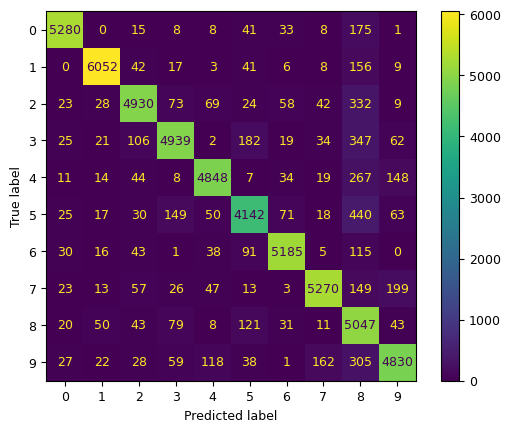

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train, cv = 3)
plt.rc('font', size = 9) # extra code for font size
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

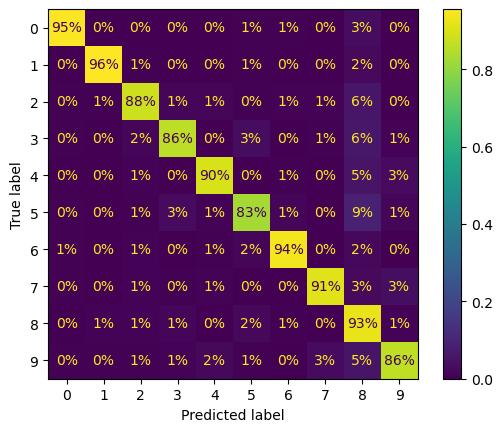

In [97]:
plt.rc('font', size = 10)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,
                                       normalize = 'true', values_format = '.0%')
plt.show()

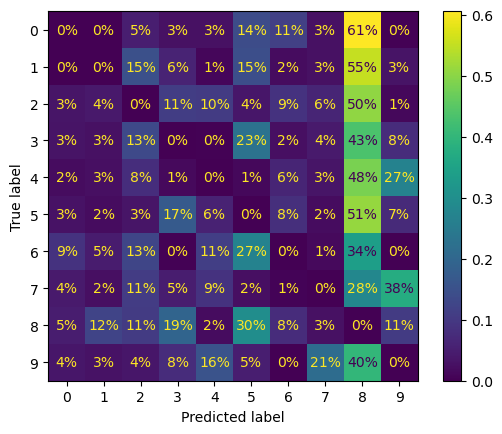

In [100]:
sample_weight = (y_train_pred != y_train)
plt.rc('font',size = 10)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,
                                        sample_weight = sample_weight,
                                        normalize = 'true', values_format = '.0%')
plt.show()

In [101]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

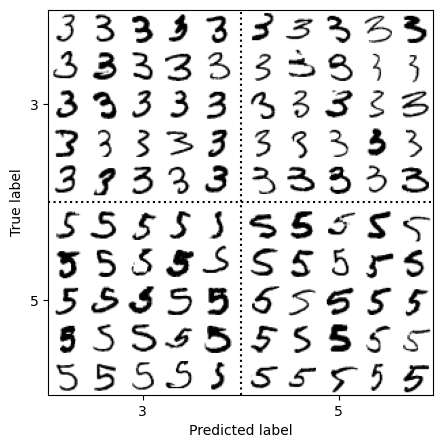

In [102]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Multilabel Classifier

In [105]:
a = [1,2,3]
b = [4,5,6]
np.c_[a,b]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [116]:
y_train_large = (y_train>='7')
y_train_odd = (y_train.astype('int8')%2==1)
y_multilabel = np.c_[y_train_large,y_train_odd]

In [117]:
y_multilabel

array([[False, False],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False,  True],
       [False, False]])

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [120]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [142]:
cross_val_score(knn_clf,X_train,y_train_multilabel,cv = 3)

array([0.97192907, 0.97476831, 0.97369549])

In [140]:
y_train_pred = cross_val_predict(knn_clf,X_train,y_train_multilabel,cv = 3)

In [141]:
f1_score(y_train_multilabel,y_train_pred,average = 'macro' )

0.9755730476296871

# Multioutput Classifier

In [143]:
np.random.seed(42)

In [157]:
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [154]:
def digit_image1(digit):
    plt.imshow(digit.reshape(28,28),cmap = 'binary')
    plt.axis('off')

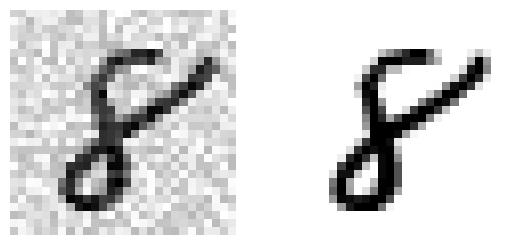

In [158]:
plt.subplot(1,2,1);
digit_image1(X_test_mod[0])
plt.subplot(1,2,2);
digit_image1(y_test_mod[0])

In [ ]:
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit = knn_clf.predict(X_train_mod)
plt.subplot(121)
digi1image1(X_train_mod)
plt.subplot(122)
digit_image1(clean_digit)